<h1>Import required libraries</h1>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<h1>Explortory Data Analysis</h1>

In [7]:
df = pd.read_csv('dataset/diabetic_data.csv')

print(df)

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

<h1>Basic Data Description & Characteristics</h1>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
# Convert integer to string: admission_type_id, discharge_dispostion, admission source
df[['admission_type_id','discharge_disposition_id','admission_source_id']] = df[['admission_type_id','discharge_disposition_id','admission_source_id']].astype(str)

In [10]:
df['readmitted'].describe()

count     101766
unique         3
top           NO
freq       54864
Name: readmitted, dtype: object

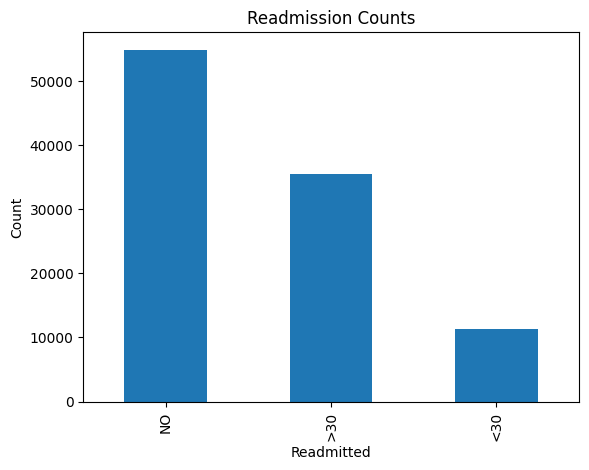

In [11]:
df['readmitted'].value_counts().plot(kind='bar')

# Add title and axes labels
plt.title('Readmission Counts')
plt.xlabel('Readmitted')
plt.ylabel('Count')

# Display the plot
plt.show()

<h3>1. Aberrant & Missing Values Detection</h3>
<p>From info above, the dataset shows there are a lot of '?' in df and they are considered ad null value</p>
<p>Hence, the step of processing data will be: </p>
<p>find the non word characters -> missing value handling -> drop the unique fetures</p>

In [12]:
# Identify non word punctuation
non_word = string.punctuation
print(non_word)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
df = df.replace('?', np.nan)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [14]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [15]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis = 1, keys =['Total','Percent'])
missing_data.head()

,Total,Percent
weight,98569,0.968585
max_glu_serum,96420,0.947468
A1Cresult,84748,0.832773
medical_specialty,49949,0.490822
payer_code,40256,0.395574


<h3>Drop features encounter_id, patient_nbr and High NaN percentage</h3>

In [16]:
# Drop unique ID and high percentage of missing values i.e Weight, Medical Speciality and Payer Code

df = df.drop(['encounter_id', 'patient_nbr', 'weight','medical_specialty','payer_code'], axis = 1)
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
df = df.replace('Unknown/Invalid', np.nan)
df.dropna(subset=["gender"], inplace=True)
df.gender.value_counts()

gender
Female    54708
Male      47055
Name: count, dtype: int64

<h1>Data Analysis</h1>

In [18]:
df_gender = df.pivot_table('admission_type_id',index = 'gender', columns = 'readmitted', aggfunc='count')
df_gender

readmitted,<30,>30,NO
gender,,,
Female,6152,19518,29038
Male,5205,16027,25823


<Axes: title={'center': 'Gender vs Readmission Count'}, xlabel='gender'>

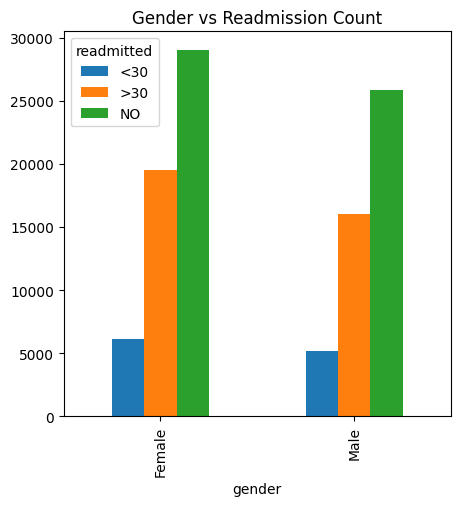

In [19]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (5, 5)})

df_gender.plot(kind='bar', title= 'Gender vs Readmission Count')

In [20]:
df_race = df.pivot_table('admission_type_id',index = 'race', columns = 'readmitted', aggfunc='count')
df_race

readmitted,<30,>30,NO
race,,,
AfricanAmerican,2155,6634,10421
Asian,65,161,415
Caucasian,8592,27124,40383
Hispanic,212,642,1183
Other,145,446,914


In [21]:
df_age = df.pivot_table('admission_type_id',index = 'age', columns = 'readmitted', aggfunc='count')
df_age

readmitted,<30,>30,NO
age,,,
[0-10),3,26,132
[10-20),40,224,427
[20-30),236,510,911
[30-40),424,1187,2164
[40-50),1027,3278,5380
[50-60),1668,5917,9671
[60-70),2502,7897,12083
[70-80),3069,9475,13522
[80-90),2078,6223,8896


<Axes: title={'center': 'Age group vs Count of Readmitted'}, xlabel='age'>

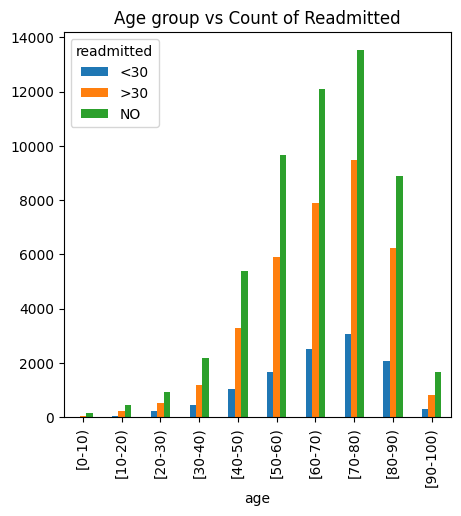

In [22]:
df_age.plot(kind='bar', title = 'Age group vs Count of Readmitted')

In [23]:
df_number_diagnoses = df.pivot_table('admission_type_id',index = 'number_diagnoses', columns = 'readmitted', aggfunc='count')
df_number_diagnoses

readmitted,<30,>30,NO
number_diagnoses,,,
1,13,39,167
2,62,274,687
3,209,763,1863
4,457,1606,3473
5,1043,2996,7353
6,1058,3397,5706
7,1119,3732,5542
8,1254,3798,5564
9,6125,18901,24447


<Axes: title={'center': 'Number of Diagnoses vs Count of Readmitted'}, xlabel='number_diagnoses'>

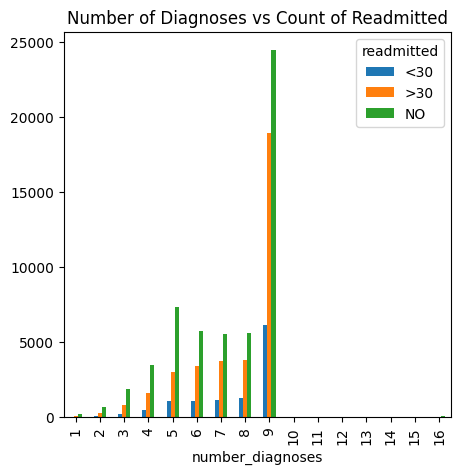

In [24]:
df_number_diagnoses.plot(kind='bar', title = 'Number of Diagnoses vs Count of Readmitted')

In [25]:
df_max_glu_serum = df.pivot_table('admission_type_id',index = ['max_glu_serum'], columns = 'readmitted', aggfunc='count')
df_max_glu_serum

readmitted,<30,>30,NO
max_glu_serum,,,
>200,185,530,770
>300,181,521,562
Norm,295,885,1417


<Axes: title={'center': 'Glucose Serum Range vs Count of Readmitted'}, xlabel='max_glu_serum'>

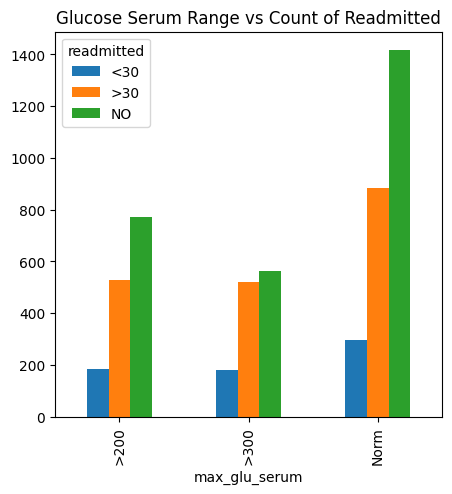

In [26]:
df_max_glu_serum.plot(kind='bar', title = 'Glucose Serum Range vs Count of Readmitted')

In [27]:
df_A1Cresult = df.pivot_table('admission_type_id',index = ['A1Cresult'], columns = 'readmitted', aggfunc='count')
df_A1Cresult

readmitted,<30,>30,NO
A1Cresult,,,
>7,383,1300,2129
>8,811,2901,4504
Norm,482,1599,2909


<Axes: title={'center': 'A1C Result vs Count of Readmitted'}, xlabel='A1Cresult'>

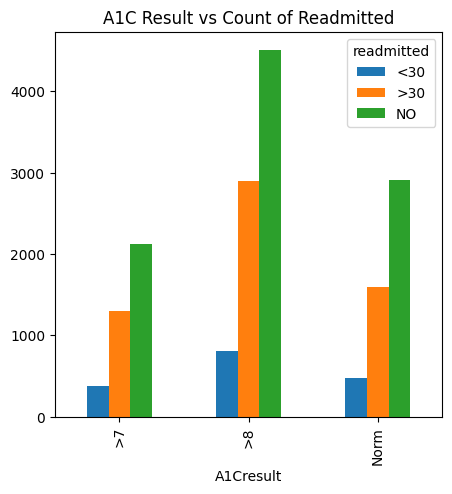

In [28]:
df_A1Cresult.plot(kind='bar', title = 'A1C Result vs Count of Readmitted')

In [29]:
df_grouped = df.groupby('change')

# Filter only the group with 'change' equal to 'No'
group_No = df_grouped.get_group('No')


In [30]:
count_up = (group_No['metformin']=='Up').sum()+(group_No['repaglinide']=='Up').sum()+(group_No['nateglinide']=='Up').sum()+(group_No['chlorpropamide']=='Up').sum()+(group_No['glimepiride']=='Up').sum()+(group_No['acetohexamide']=='Up').sum()+(group_No['glipizide']=='Up').sum()+(group_No['glyburide']=='Up').sum()+(group_No['tolbutamide']=='Up').sum()+(group_No['pioglitazone']=='Up').sum()+(group_No['rosiglitazone']=='Up').sum()+(group_No['acarbose']=='Up').sum()+(group_No['miglitol']=='Up').sum()+(group_No['troglitazone']=='Up').sum()+(group_No['tolazamide']=='Up').sum()+(group_No['examide']=='Up').sum()+(group_No['citoglipton']=='Up').sum()+(group_No['insulin']=='Up').sum()+(group_No['glyburide-metformin']=='Up').sum()+(group_No['glipizide-metformin']=='Up').sum()+(group_No['glimepiride-pioglitazone']=='Up').sum()+(group_No['metformin-rosiglitazone']=='Up').sum()+(group_No['metformin-pioglitazone']=='Up').sum()
count_up

np.int64(0)

In [31]:
count_down = (group_No['metformin']=='Down').sum()+(group_No['repaglinide']=='Down').sum()+(group_No['nateglinide']=='Down').sum()+(group_No['chlorpropamide']=='Down').sum()+(group_No['glimepiride']=='Down').sum()+(group_No['acetohexamide']=='Down').sum()+(group_No['glipizide']=='Down').sum()+(group_No['glyburide']=='Down').sum()+(group_No['tolbutamide']=='Down').sum()+(group_No['pioglitazone']=='Down').sum()+(group_No['rosiglitazone']=='Down').sum()+(group_No['acarbose']=='Down').sum()+(group_No['miglitol']=='Down').sum()+(group_No['troglitazone']=='Down').sum()+(group_No['tolazamide']=='Down').sum()+(group_No['examide']=='Down').sum()+(group_No['citoglipton']=='Down').sum()+(group_No['insulin']=='Down').sum()+(group_No['glyburide-metformin']=='Down').sum()+(group_No['glipizide-metformin']=='Down').sum()+(group_No['glimepiride-pioglitazone']=='Down').sum()+(group_No['metformin-rosiglitazone']=='Down').sum()+(group_No['metformin-pioglitazone']=='Down').sum()
count_down

np.int64(0)

In [32]:
df_grouped = df.groupby('change')

# Filter only the group with 'change' equal to 'No'
group_Ch = df_grouped.get_group('Ch')

In [33]:
count_chup = (group_Ch['metformin']=='Up').sum()+(group_Ch['repaglinide']=='Up').sum()+(group_Ch['nateglinide']=='Up').sum()+(group_Ch['chlorpropamide']=='Up').sum()+(group_Ch['glimepiride']=='Up').sum()+(group_Ch['acetohexamide']=='Up').sum()+(group_Ch['glipizide']=='Up').sum()+(group_Ch['glyburide']=='Up').sum()+(group_Ch['tolbutamide']=='Up').sum()+(group_Ch['pioglitazone']=='Up').sum()+(group_Ch['rosiglitazone']=='Up').sum()+(group_Ch['acarbose']=='Up').sum()+(group_Ch['miglitol']=='Up').sum()+(group_Ch['troglitazone']=='Up').sum()+(group_Ch['tolazamide']=='Up').sum()+(group_Ch['examide']=='Up').sum()+(group_Ch['citoglipton']=='Up').sum()+(group_Ch['insulin']=='Up').sum()+(group_Ch['glyburide-metformin']=='Up').sum()+(group_Ch['glipizide-metformin']=='Up').sum()+(group_Ch['glimepiride-pioglitazone']=='Up').sum()+(group_Ch['metformin-rosiglitazone']=='Up').sum()+(group_Ch['metformin-pioglitazone']=='Up').sum()
count_chup

np.int64(14865)

In [34]:
count_chdown = (group_Ch['metformin']=='Down').sum()+(group_Ch['repaglinide']=='Down').sum()+(group_Ch['nateglinide']=='Down').sum()+(group_Ch['chlorpropamide']=='Down').sum()+(group_Ch['glimepiride']=='Down').sum()+(group_Ch['acetohexamide']=='Down').sum()+(group_Ch['glipizide']=='Down').sum()+(group_Ch['glyburide']=='Down').sum()+(group_Ch['tolbutamide']=='Down').sum()+(group_Ch['pioglitazone']=='Down').sum()+(group_Ch['rosiglitazone']=='Down').sum()+(group_Ch['acarbose']=='Down').sum()+(group_Ch['miglitol']=='Down').sum()+(group_Ch['troglitazone']=='Down').sum()+(group_Ch['tolazamide']=='Down').sum()+(group_Ch['examide']=='Down').sum()+(group_Ch['citoglipton']=='Down').sum()+(group_Ch['insulin']=='Down').sum()+(group_Ch['glyburide-metformin']=='Down').sum()+(group_Ch['glipizide-metformin']=='Down').sum()+(group_Ch['glimepiride-pioglitazone']=='Down').sum()+(group_Ch['metformin-rosiglitazone']=='Down').sum()+(group_Ch['metformin-pioglitazone']=='Down').sum()
count_chdown

np.int64(14387)

In [35]:
df_change = df.pivot_table('admission_type_id',index = 'change', columns = 'readmitted', aggfunc='count')
df_change

readmitted,<30,>30,NO
change,,,
Ch,5558,17272,24179
No,5799,18273,30682


<Axes: title={'center': 'Changes in Diabetes Medication vs Count of Readmitted'}, xlabel='change'>

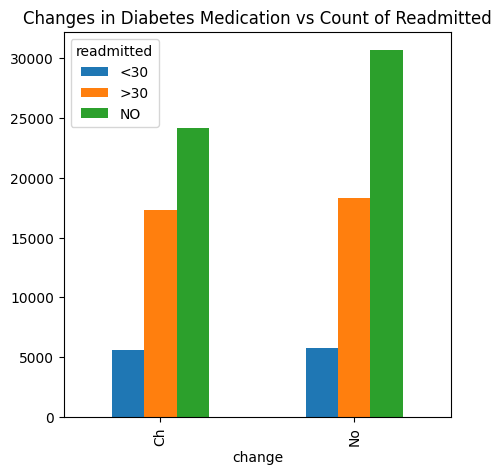

In [36]:
df_change.plot(kind='bar', title = 'Changes in Diabetes Medication vs Count of Readmitted')

In [37]:
df_diabetesMed = df.pivot_table('admission_type_id',index = 'diabetesMed', columns = 'readmitted', aggfunc='count')
df_diabetesMed

readmitted,<30,>30,NO
diabetesMed,,,
No,2246,7227,13929
Yes,9111,28318,40932


<Axes: title={'center': 'Diabetes Medication Prescribed vs Count of Readmitted'}, xlabel='diabetesMed'>

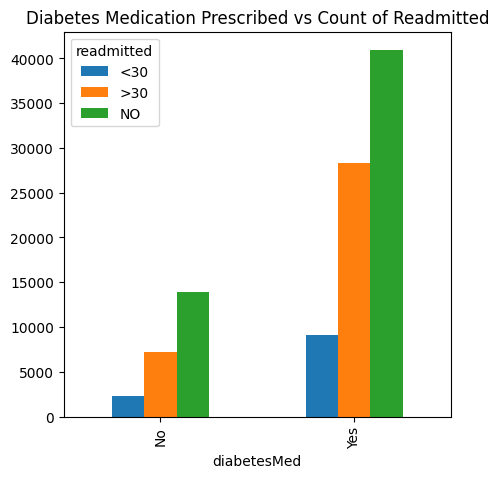

In [38]:
df_diabetesMed.plot(kind='bar', title = 'Diabetes Medication Prescribed vs Count of Readmitted')

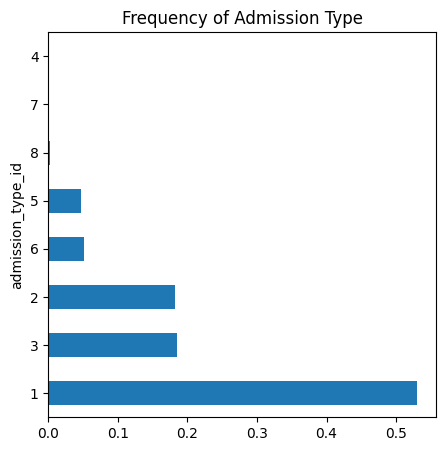

In [39]:
df.admission_type_id.value_counts(normalize=True).plot(kind ='barh', title = 'Frequency of Admission Type')
plt.show()

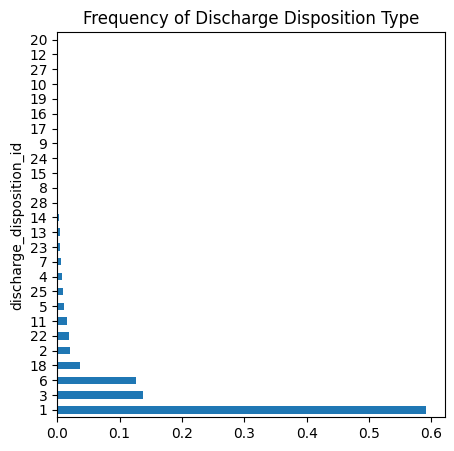

In [40]:
df.discharge_disposition_id.value_counts(normalize=True).plot(kind ='barh', title = 'Frequency of Discharge Disposition Type')
plt.show()

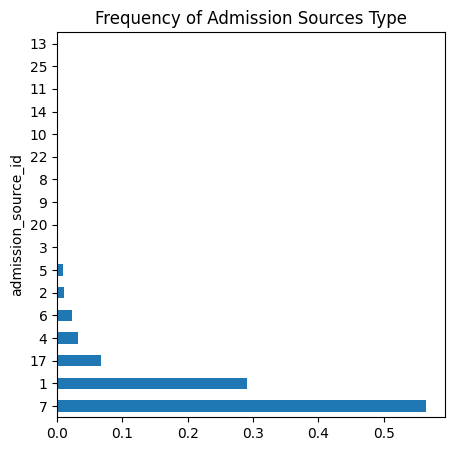

In [41]:
# Admission Sources frequency
df.admission_source_id.value_counts(normalize=True).plot(kind ='barh', title = 'Frequency of Admission Sources Type')
plt.show()

In [42]:
df.corr(numeric_only=True)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318429,0.191497,0.466137,-0.008919,-0.009683,0.073619,0.220153
num_lab_procedures,0.318429,1.000000,0.058105,0.268176,-0.007606,-0.002282,0.039225,0.152737
num_procedures,0.191497,0.058105,1.000000,0.385761,-0.024813,-0.038175,-0.066226,0.073769
num_medications,0.466137,0.268176,0.385761,1.000000,0.045198,0.013180,0.064196,0.261529
number_outpatient,-0.008919,-0.007606,-0.024813,0.045198,1.000000,0.091457,0.107334,0.094148
number_emergency,-0.009683,-0.002282,-0.038175,0.013180,0.091457,1.000000,0.266557,0.055536
number_inpatient,0.073619,0.039225,-0.066226,0.064196,0.107334,0.266557,1.000000,0.104703
number_diagnoses,0.220153,0.152737,0.073769,0.261529,0.094148,0.055536,0.104703,1.000000


<Axes: >

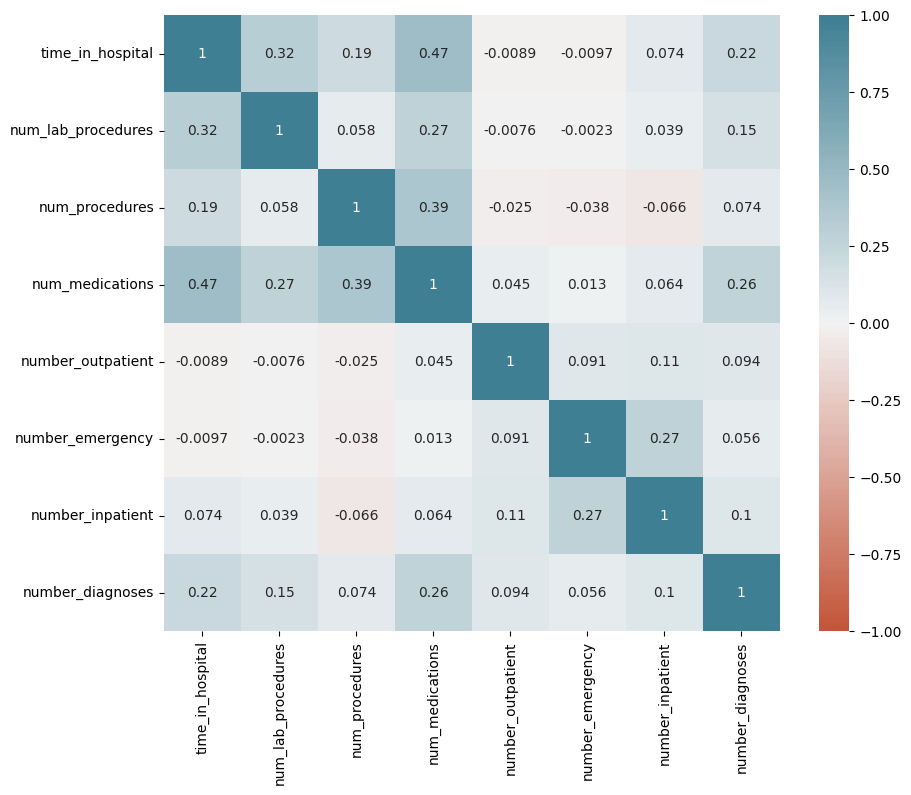

In [43]:
#correlation matrix
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots (figsize =(10,8))
sns.heatmap(corrmat, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n=200), square = True, annot = True)


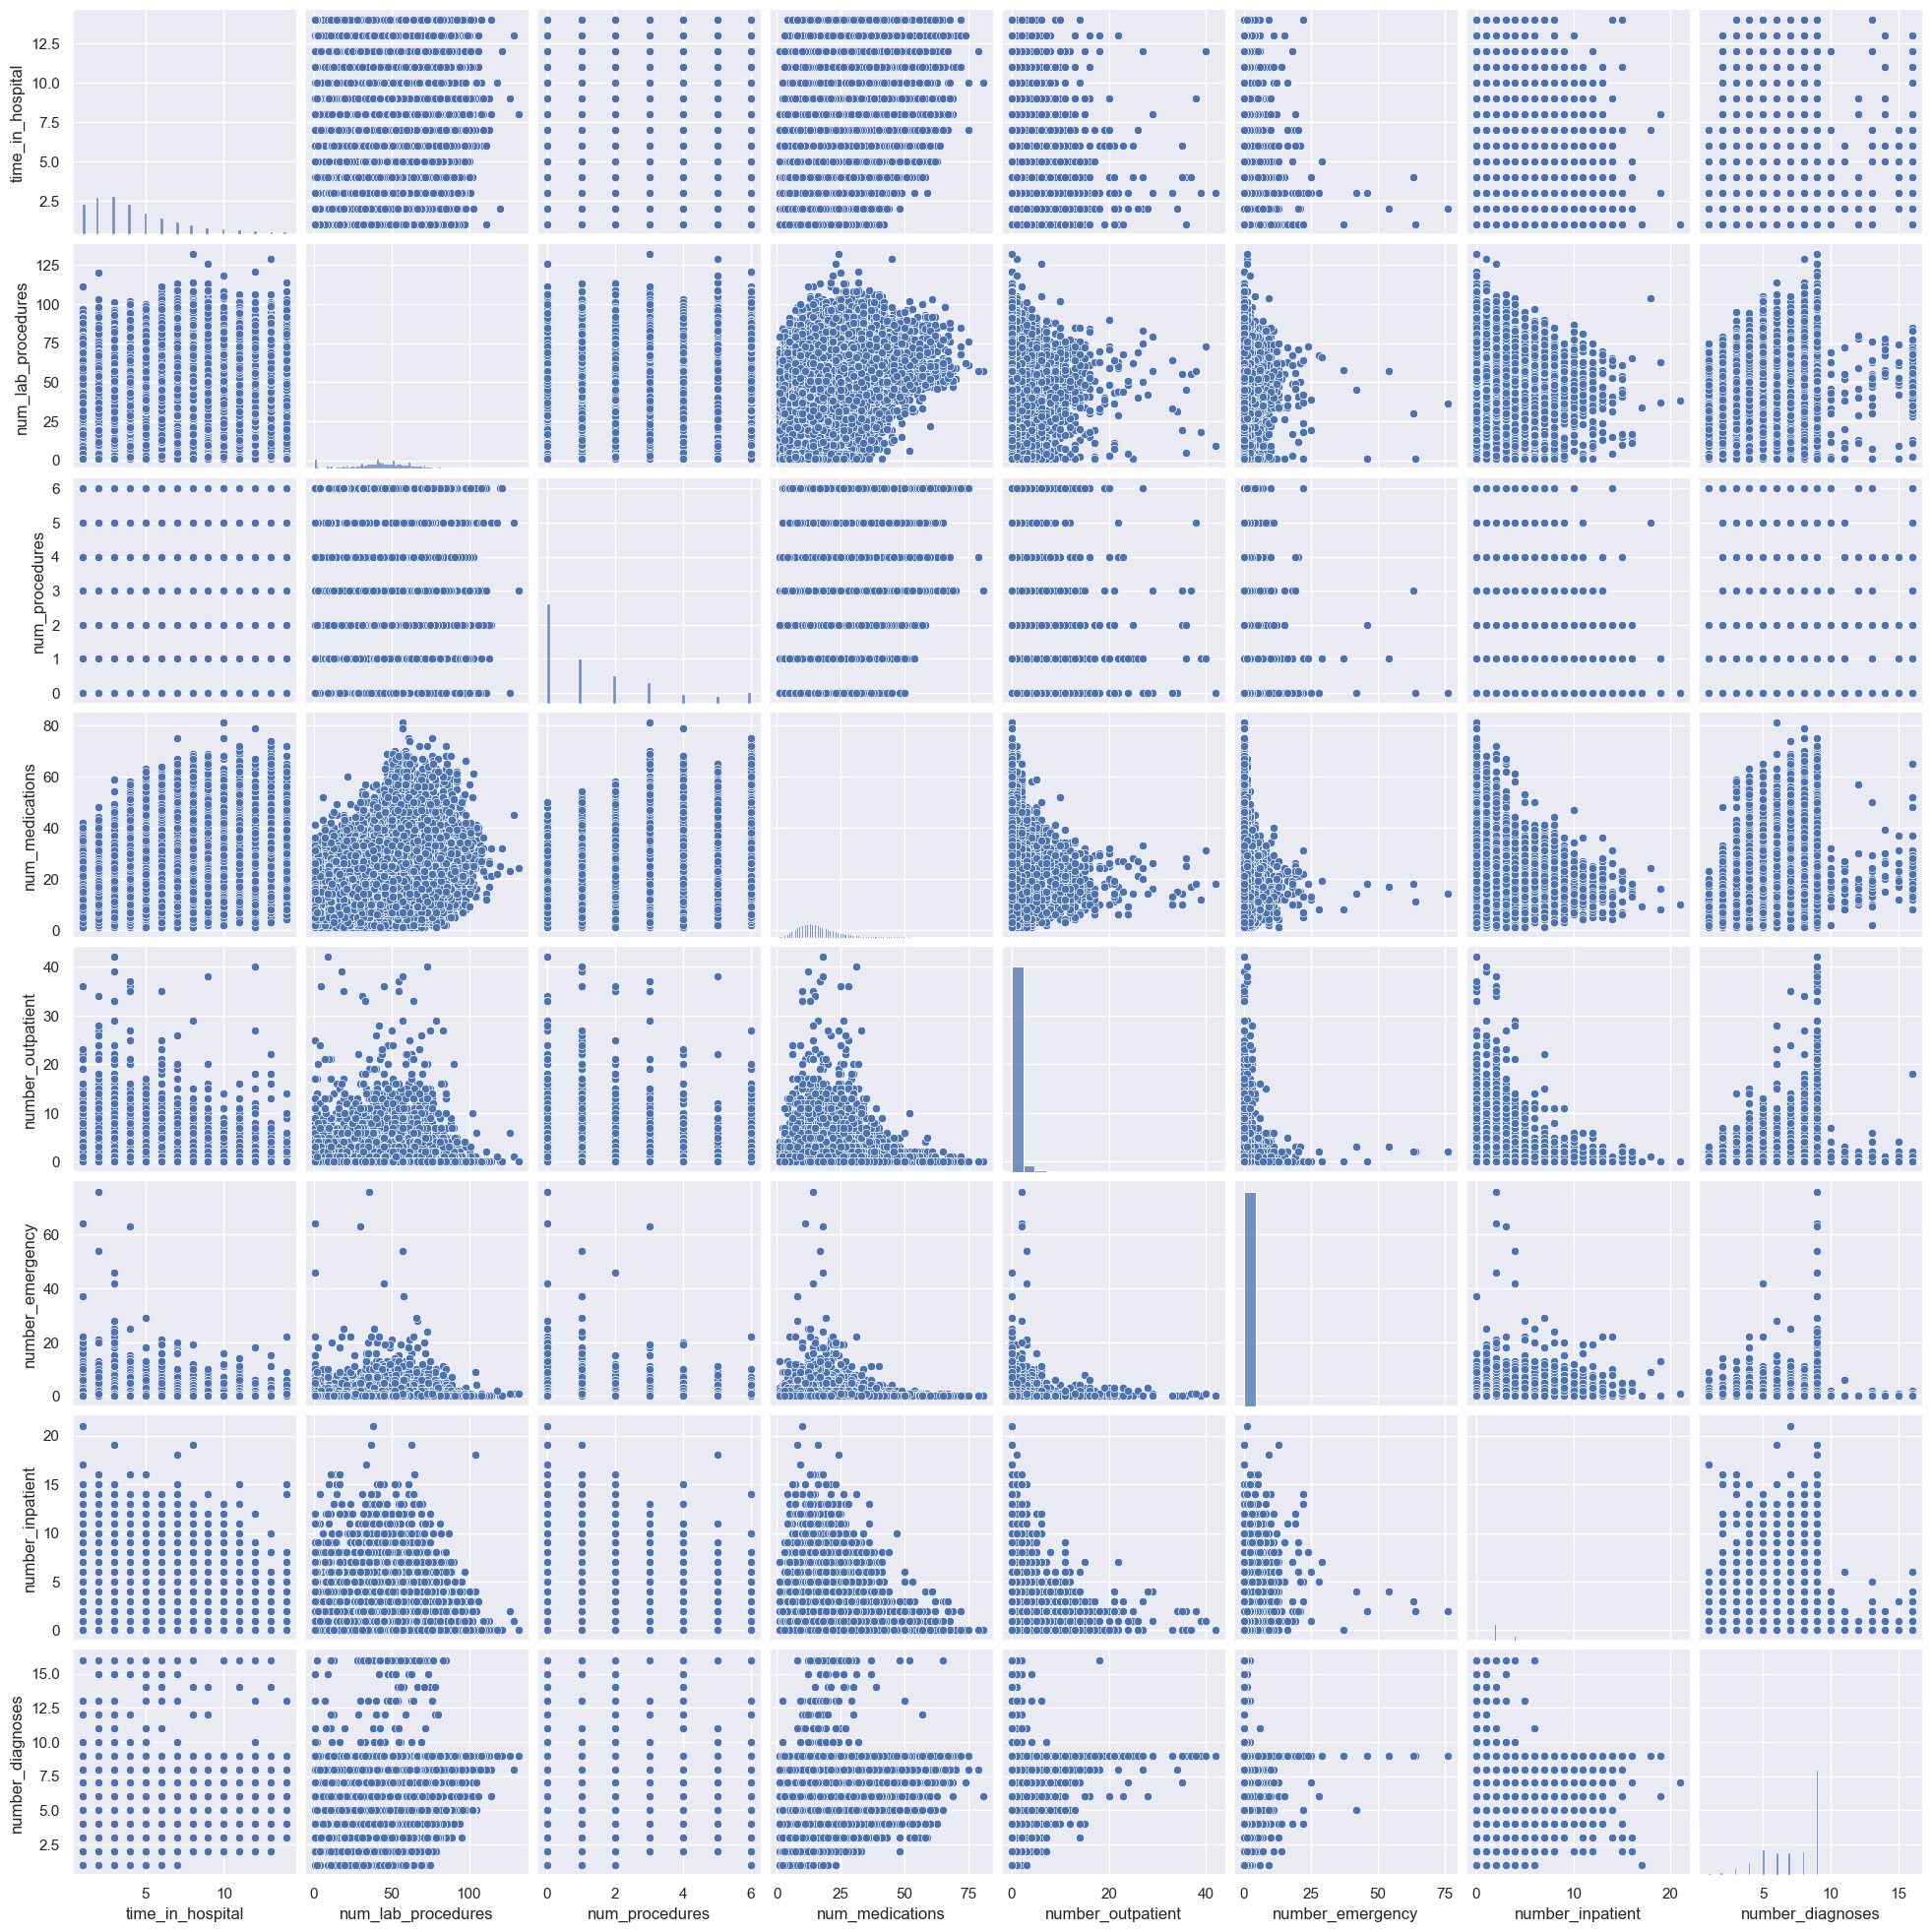

In [44]:
# Scatterplot to identify outlier
sns.set()
cols = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
sns.pairplot(df[cols], height=2.5)
plt.show()

In [45]:
import pandas as pd
import os

df=pd.read_csv('dataset/diabetic_data.csv')
df.shape

(101766, 50)

In [46]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [47]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [48]:
def IQR(lb,hb):
    return (hb-lb)*1.5

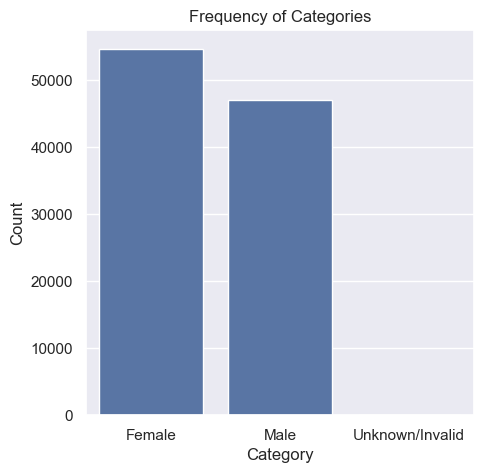

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the bar chart
sns.countplot(x='gender', data=df)
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


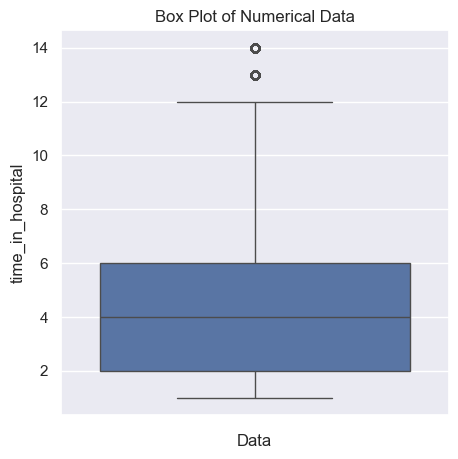

In [50]:
# Create the box plot
sns.boxplot(data=df['time_in_hospital'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()

In [51]:
df['time_in_hospital'].describe()

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

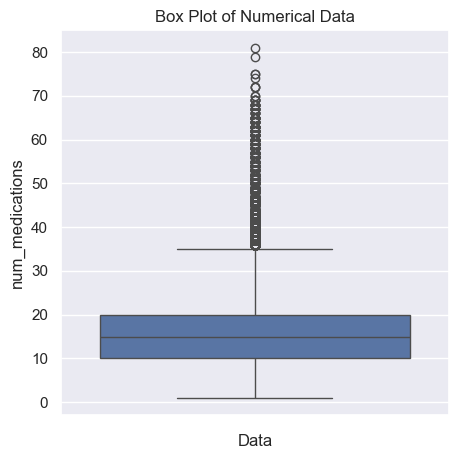

In [52]:
# Create the box plot
sns.boxplot(data=df['num_medications'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()
##2557 outliers >=36

In [53]:
df['num_medications'].describe()

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

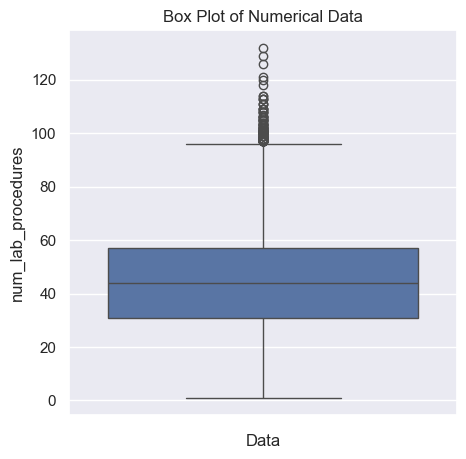

In [54]:
# Create the box plot
sns.boxplot(data=df['num_lab_procedures'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()

##143 outliers -> >=97

In [55]:
df['num_lab_procedures'].describe()

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64

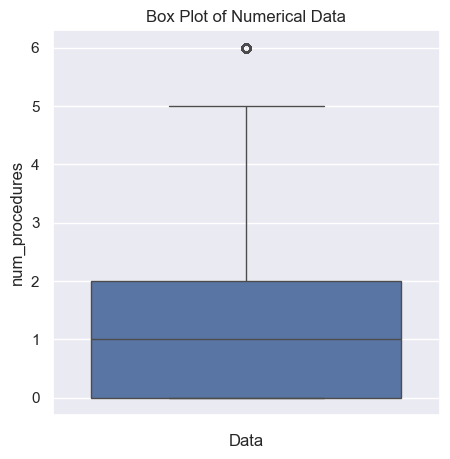

In [56]:
# Create the box plot
sns.boxplot(data=df['num_procedures'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()

In [57]:
df['num_procedures'].describe()

count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64

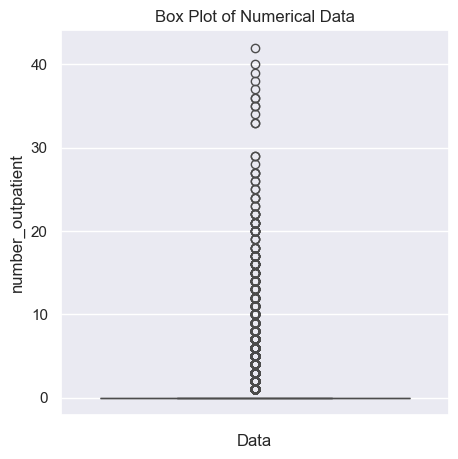

In [58]:
# Create the box plot
sns.boxplot(data=df['number_outpatient'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()

In [59]:
df['number_outpatient'].describe()

count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64

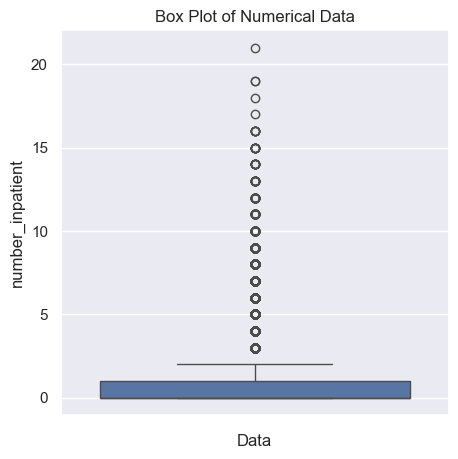

In [60]:
# Create the box plot
sns.boxplot(data=df['number_inpatient'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()

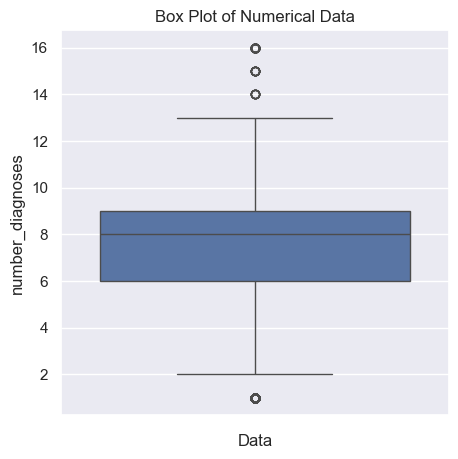

In [61]:
# Create the box plot
sns.boxplot(data=df['number_diagnoses'])

# Add labels and formatting
plt.title('Box Plot of Numerical Data')
plt.xlabel('Data')

# Show the plot
plt.show()

In [62]:
df['number_diagnoses'].describe()

count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64

## Data Preprocessing

In [63]:
df = df.drop('encounter_id',axis=1)
df = df.drop('patient_nbr',axis=1)
df = df.drop('weight',axis=1)
df = df.drop('payer_code',axis=1)
df = df.drop('medical_specialty',axis=1)
# df = df.drop('number_outpatient',axis=1)
# df = df.drop('number_inpatient',axis=1)

df = df.drop('metformin', axis=1)
df = df.drop('repaglinide', axis=1)
df = df.drop('nateglinide', axis=1)
df = df.drop('chlorpropamide', axis=1)
df = df.drop('glimepiride', axis=1)
df = df.drop('glipizide', axis=1)
df = df.drop('glyburide', axis=1)
df = df.drop('tolbutamide', axis=1)
df = df.drop('pioglitazone', axis=1)
df = df.drop('rosiglitazone', axis=1)
df = df.drop('acarbose', axis=1)
df = df.drop('miglitol', axis=1)
df = df.drop('troglitazone', axis=1)
df = df.drop('tolazamide', axis=1)
df = df.drop('glyburide-metformin', axis=1)
df = df.drop('glipizide-metformin', axis=1)
df = df.drop('glimepiride-pioglitazone', axis=1)
df = df.drop('metformin-rosiglitazone', axis=1)
df = df.drop('metformin-pioglitazone', axis=1)
df = df.drop('examide', axis=1)
df = df.drop('citoglipton', axis=1)
df = df.drop('acetohexamide', axis=1)

In [64]:
HighestBoundary = IQR(2,6)+6
df.loc[df['time_in_hospital'] > HighestBoundary, 'time_in_hospital'] = HighestBoundary

HighestBoundary = IQR(10,20)+20
df.loc[df['num_medications'] > HighestBoundary, 'num_medications'] = HighestBoundary

HighestBoundary = IQR(31,57)+57
df.loc[df['num_lab_procedures'] > HighestBoundary, 'num_lab_procedures'] = HighestBoundary

HighestBoundary = IQR(0,2)+2
df.loc[df['num_procedures'] > HighestBoundary, 'num_procedures'] = HighestBoundary


HighestBoundary = IQR(6,9)+9
LowestBoundary = 6-IQR(6,9)
df.loc[df['number_diagnoses'] > HighestBoundary, 'number_diagnoses'] = HighestBoundary
df.loc[df['number_diagnoses'] < LowestBoundary, 'number_diagnoses'] = LowestBoundary




df = df.replace('?', df['race'].mode().values[0])
df = df.replace('Unknown/Invalid', df['gender'].mode().values[0])

labels_to_replace = [5, 6, 8]
replacement_value = 6
# Apply replace on the DataFrame column
df['admission_type_id'] = df['admission_type_id'].replace(labels_to_replace, replacement_value)
df['admission_type_id'] = df['admission_type_id'].replace(7, 5)



labels_to_replace = [18, 25, 26]
replacement_value = 18
# Apply replace on the DataFrame column
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(labels_to_replace, replacement_value)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(27, 25)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(28, 26)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(29, 27)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(30, 28)


labels_to_replace = [9,15,17, 20, 21]
replacement_value = 9
# Apply replace on the DataFrame column
df['admission_source_id'] = df['admission_source_id'].replace(labels_to_replace, replacement_value)
df['admission_source_id'] = df['admission_source_id'].replace(18, 15)
df['admission_source_id'] = df['admission_source_id'].replace(19, 17)
df['admission_source_id'] = df['admission_source_id'].replace(22, 18)
df['admission_source_id'] = df['admission_source_id'].replace(23, 19)
df['admission_source_id'] = df['admission_source_id'].replace(24, 20)
df['admission_source_id'] = df['admission_source_id'].replace(25, 21)
df['admission_source_id'] = df['admission_source_id'].replace(26, 22)

print(df['admission_type_id'])

0         6
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 101766, dtype: int64


C:\Users\1000304936\AppData\Local\Temp\ipykernel_8860\2778918702.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['number_diagnoses'] > HighestBoundary, 'number_diagnoses'] = HighestBoundary


In [65]:

code_list = [str(num).zfill(3) for num in range(1, 100)]
code_ranges = {
    'Circulatory': list(range(390, 460)) + ['785'],
    'Respiratory': list(range(460, 520))+ ['786'],
    'Digestive': list(range(520, 580))+ ['787','789'],
    'Diabetes': [str(num) for num in range(250, 251)] + [f'250.{num:02d}' for num in range(0, 100)]+['250.1', '250.2', '250.3','250.4', '250.5', '250.6','250.7','250.8','250.9'],
    'Injury': list(range(800, 1000)),
    'Musculoskeletal': list(range(710, 740)),
    'Genitourinary': list(range(580, 630))+ ['788'],
    'Neoplasms': list(range(140, 240)),
    'Others': code_list + list(range(1,140)) + list(range(240,250)) + list(range(251,390))+ list(range(630,710)) + list(range(740,760)) + ['780','781','782','783','784']+list(range(790,800))+[f'V{num:02d}' for num in range(1, 100)]+[f'E{num:03d}' for num in range(1, 1000)]
}

# Create a new column 'Group' and assign the corresponding group names
df['diag_1'] = df['diag_1'].apply(lambda x: next((group for group, codes in code_ranges.items() if str(x) in map(str, codes)), 'Unknown'))
df['diag_2'] = df['diag_2'].apply(lambda x: next((group for group, codes in code_ranges.items() if str(x) in map(str, codes)), 'Unknown'))
df['diag_3'] = df['diag_3'].apply(lambda x: next((group for group, codes in code_ranges.items() if str(x) in map(str, codes)), 'Unknown'))
df = df.replace('Unknown', df['diag_1'].mode().values[0])
df = df.replace('Unknown', df['diag_2'].mode().values[0])
df = df.replace('Unknown', df['diag_3'].mode().values[0])



In [66]:
bins = [-1, 0, 1, 2, 3, float('inf')]
labels = [0, 1, 2, 3, ">3"]

# Convert the feature column to the bin values
df['number_inpatient'] = pd.cut(df['number_inpatient'], bins=bins, labels=labels, right=True)

df['number_inpatient']

0         0
1         0
2         1
3         0
4         0
         ..
101761    0
101762    1
101763    0
101764    1
101765    0
Name: number_inpatient, Length: 101766, dtype: category
Categories (5, object): [0 < 1 < 2 < 3 < '>3']

In [67]:
df['number_outpatient'] = pd.cut(df['number_outpatient'], bins=[-1,0, 1, 20, float('inf')], labels=['0','1', '1-20', '>20'], right=True)
df['number_outpatient']

0            0
1            0
2         1-20
3            0
4            0
          ... 
101761       0
101762       0
101763       1
101764       0
101765       0
Name: number_outpatient, Length: 101766, dtype: category
Categories (4, object): ['0' < '1' < '1-20' < '>20']

In [68]:
def replace_last_character(value, new_character):
    if isinstance(value, str):
        return value[:-1] + new_character

# Convert 'age' column to string type
df['age'] = df['age'].astype(str)

# Replace the last character in the 'age' column with ']'
df['age'] = df['age'].apply(lambda x: replace_last_character(x, ']'))

# Print the modified 'age' column
df['age']


0          [0-10]
1         [10-20]
2         [20-30]
3         [30-40]
4         [40-50]
           ...   
101761    [70-80]
101762    [80-90]
101763    [70-80]
101764    [80-90]
101765    [70-80]
Name: age, Length: 101766, dtype: object

In [69]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_race = pd.get_dummies(df['race'])
df_encoded = pd.concat([df, one_hot_encoded_race], axis=1)
df_encoded.to_csv('Latest_output_NoOutliers.csv', index=False)


admission_type_id_labels = {1: 'AT-Emergency', 2: 'AT-Urgent', 3: 'AT-Elective', 4: 'AT-Newborn', 5: 'AT-Trauma_Center',6:'AT-Others'}
df_encoded['admission_type_id'] = df_encoded['admission_type_id'].map(admission_type_id_labels)
one_hot_encoded_AT = pd.get_dummies(df_encoded['admission_type_id'])
df_encoded = pd.concat([df_encoded, one_hot_encoded_AT], axis=1)


discharge_disposition_id_labels = {1: 'DD-Home', 2: 'DD-Short-Term_Hosp', 3: 'DD-SNF', 4: 'DD-ICF',
                                   5: 'DD-Inpatient_Care_Institution',6:'DD-Home_HealthService',7:'DD-Left_AMA',
                                   8:'DD-Home_UnderHomeProvider',9:'DD-Admitted_Inpatient_Hosp',
                                   10:'DD-Neonate_Discharge_Another_Hosp',11:'DD-Expired',12:'DD-Still_Patient',
                                   13:'DD-Hospice_Home',14:'DD-Hospice_MedicalFacility',15:'DD-Medicare_SwingBed',
                                   16:'DD-Another_OutpatientService',17:'DD-This_OutpatientService',18:'DD-Others',
                                   19:'DD-Expired_Home',20:'DD-Expired_MedicalFaculty',21:'DD-Expired_PlaceUnknown',
                                   22:'DD-Another_RehadFac',23:'DD-LongTerm_CareHosp',24:'DD-Nursing_Fac',
                                   25:'DD-Fed_HealthCare',26:'DD-Psychiatric_Hosp',27:'DD-Critical_Access_Hosp',
                                   28:'DD-Another_HealthCare_NotDefined'}
df_encoded['discharge_disposition_id'] = df_encoded['discharge_disposition_id'].map(discharge_disposition_id_labels)
one_hot_encoded_DD = pd.get_dummies(df_encoded['discharge_disposition_id'])
df_encoded = pd.concat([df_encoded, one_hot_encoded_DD], axis=1)


admission_source_id_labels = {1: 'AS-Physician_Ref', 2: 'AS-Clinic_Ref', 3: 'AS-HMO_Ref', 4: 'AS-Trans_Hosp', 5: 'AS-Trans_SNF',
                              6:'AS-Trans_Another_HealthCareFaculty',7:'AS-EmergencyRoom',8:'AS-Court_Law',9:'AS-Others',
                              10:'AS-Trans_CAH',11:'AS-Norm_Delivery',12:'AS-Premature_Delivery',13:'AS-Sick_Baby',
                              14:'AS-Extramural_Birth',15:'AS-Trans_Another_HomeHealthAgency',16:'AS-NotLabeled',
                              17:'AS-Readmission_Same_HomeHealthAgency',18:'AS-Trans_Hosp_SepClaim',19:'AS-Born_In_Hosp',
                              20:'AS-Born_Out_Hosp',21:'AS-Trans_ASC',22:'AS-Trans_Hospice'}
df_encoded['admission_source_id'] = df_encoded['admission_source_id'].map(admission_source_id_labels)
one_hot_encoded_AS = pd.get_dummies(df_encoded['admission_source_id'])
df_encoded = pd.concat([df_encoded, one_hot_encoded_AS], axis=1)

diag_1_labels = {'Circulatory':'diag1_Circulatory', 'Diabetes': 'diag1_Diabetes', 'Digestive': 'diag1_Digestive', 'Genitourinary': 'diag1_Genitourinary', 'Injury': 'diag1_Injury', 'Musculoskeletal': 'diag1_Musculoskeletal','Neoplasms':'diag1_Neoplasms','Others':'diag1_Others','Respiratory':'diag1_Respiratory'}
diag_2_labels = {'Circulatory':'diag2_Circulatory', 'Diabetes': 'diag2_Diabetes', 'Digestive': 'diag2_Digestive', 'Genitourinary': 'diag2_Genitourinary', 'Injury': 'diag2_Injury', 'Musculoskeletal': 'diag2_Musculoskeletal','Neoplasms':'diag2_Neoplasms','Others':'diag2_Others','Respiratory':'diag2_Respiratory'}
diag_3_labels = {'Circulatory':'diag3_Circulatory', 'Diabetes': 'diag3_Diabetes', 'Digestive': 'diag3_Digestive', 'Genitourinary': 'diag3_Genitourinary', 'Injury': 'diag3_Injury', 'Musculoskeletal': 'diag3_Musculoskeletal','Neoplasms':'diag3_Neoplasms','Others':'diag3_Others','Respiratory':'diag3_Respiratory'}
df_encoded['diag_1'] = df_encoded['diag_1'].map(diag_1_labels)
df_encoded['diag_2'] = df_encoded['diag_2'].map(diag_2_labels)
df_encoded['diag_3'] = df_encoded['diag_3'].map(diag_3_labels)
one_hot_encoded_diag1 = pd.get_dummies(df_encoded['diag_1'])
df_encoded = pd.concat([df_encoded, one_hot_encoded_diag1], axis=1)
one_hot_encoded_diag2 = pd.get_dummies(df_encoded['diag_2'])
df_encoded = pd.concat([df_encoded, one_hot_encoded_diag2], axis=1)
one_hot_encoded_diag3 = pd.get_dummies(df_encoded['diag_3'])
df_encoded = pd.concat([df_encoded, one_hot_encoded_diag3], axis=1)

df_encoded=df_encoded.drop('race', axis=1)
df_encoded=df_encoded.drop('admission_type_id', axis=1)
df_encoded=df_encoded.drop('discharge_disposition_id', axis=1)
df_encoded=df_encoded.drop('admission_source_id', axis=1)
df_encoded=df_encoded.drop('diag_1', axis=1)
df_encoded=df_encoded.drop('diag_2', axis=1)
df_encoded=df_encoded.drop('diag_3', axis=1)

rearrange_order = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other','gender', 'age','AT-Elective', 'AT-Emergency', 'AT-Newborn', 
                   'AT-Trauma_Center', 'AT-Urgent','AT-Others','DD-Admitted_Inpatient_Hosp', 'DD-Another_OutpatientService', 'DD-Another_RehadFac', 
                   'DD-Expired', 'DD-Expired_Home', 'DD-Expired_MedicalFaculty', 'DD-Fed_HealthCare', 'DD-Home', 'DD-Home_HealthService', 
                   'DD-Home_UnderHomeProvider', 'DD-Hospice_Home', 'DD-Hospice_MedicalFacility', 'DD-ICF', 'DD-Inpatient_Care_Institution', 
                   'DD-Left_AMA', 'DD-LongTerm_CareHosp', 'DD-Medicare_SwingBed', 'DD-Neonate_Discharge_Another_Hosp', 
                   'DD-Nursing_Fac', 'DD-Psychiatric_Hosp', 'DD-SNF', 'DD-Short-Term_Hosp', 'DD-Still_Patient', 'DD-This_OutpatientService','DD-Others', 
                   'AS-Clinic_Ref', 'AS-Court_Law', 'AS-EmergencyRoom', 'AS-Extramural_Birth', 'AS-HMO_Ref',  'AS-Norm_Delivery', 
                   'AS-Physician_Ref', 'AS-Sick_Baby', 'AS-Trans_ASC', 'AS-Trans_Another_HealthCareFaculty', 'AS-Trans_CAH', 'AS-Trans_Hosp', 
                   'AS-Trans_Hosp_SepClaim', 'AS-Trans_SNF', 'AS-Others','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications', 
                   'number_outpatient','number_emergency','number_inpatient',
                   'diag1_Circulatory', 'diag1_Diabetes', 'diag1_Digestive',
                   'diag1_Genitourinary', 'diag1_Injury', 'diag1_Musculoskeletal',
                   'diag1_Neoplasms', 'diag1_Others', 'diag1_Respiratory',
                   'diag2_Circulatory', 'diag2_Diabetes', 'diag2_Digestive',
                   'diag2_Genitourinary', 'diag2_Injury', 'diag2_Musculoskeletal',
                   'diag2_Neoplasms', 'diag2_Others', 'diag2_Respiratory',
                   'diag3_Circulatory', 'diag3_Diabetes', 'diag3_Digestive',
                   'diag3_Genitourinary', 'diag3_Injury', 'diag3_Musculoskeletal',
                   'diag3_Neoplasms', 'diag3_Others', 'diag3_Respiratory','number_diagnoses', 'max_glu_serum', 'A1Cresult',
                   'insulin',
                   'change', 'diabetesMed', 'readmitted']

df_encoded = df_encoded[rearrange_order]
df_encoded.to_csv('Latest_output_NoOutliers.csv', index=False)


In [70]:
# Set the display option to show all column names
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print the column names
print(df_encoded.columns.to_list())

['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender', 'age', 'AT-Elective', 'AT-Emergency', 'AT-Newborn', 'AT-Trauma_Center', 'AT-Urgent', 'AT-Others', 'DD-Admitted_Inpatient_Hosp', 'DD-Another_OutpatientService', 'DD-Another_RehadFac', 'DD-Expired', 'DD-Expired_Home', 'DD-Expired_MedicalFaculty', 'DD-Fed_HealthCare', 'DD-Home', 'DD-Home_HealthService', 'DD-Home_UnderHomeProvider', 'DD-Hospice_Home', 'DD-Hospice_MedicalFacility', 'DD-ICF', 'DD-Inpatient_Care_Institution', 'DD-Left_AMA', 'DD-LongTerm_CareHosp', 'DD-Medicare_SwingBed', 'DD-Neonate_Discharge_Another_Hosp', 'DD-Nursing_Fac', 'DD-Psychiatric_Hosp', 'DD-SNF', 'DD-Short-Term_Hosp', 'DD-Still_Patient', 'DD-This_OutpatientService', 'DD-Others', 'AS-Clinic_Ref', 'AS-Court_Law', 'AS-EmergencyRoom', 'AS-Extramural_Birth', 'AS-HMO_Ref', 'AS-Norm_Delivery', 'AS-Physician_Ref', 'AS-Sick_Baby', 'AS-Trans_ASC', 'AS-Trans_Another_HealthCareFaculty', 'AS-Trans_CAH', 'AS-Trans_Hosp', 'AS-Trans_Hosp_SepClaim', 'AS-Trans_

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df=pd.read_csv('Latest_output_NoOutliers.csv')

df['gender'] = df['gender'].astype(str)
df['gender']=le.fit_transform(df['gender'])

df['age'] = df['age'].astype(str)
df['age']=le.fit_transform(df['age'])


df['max_glu_serum'] = df['max_glu_serum'].astype(str)
df['max_glu_serum']=le.fit_transform(df['max_glu_serum'])

df['A1Cresult'] = df['A1Cresult'].astype(str)
df['A1Cresult']=le.fit_transform(df['A1Cresult'])


df['insulin'] = df['insulin'].astype(str)
df['insulin']=le.fit_transform(df['insulin'])


df['change'] = df['change'].astype(str)
df['change']=le.fit_transform(df['change'])

df['diabetesMed'] = df['diabetesMed'].astype(str)
df['diabetesMed']=le.fit_transform(df['diabetesMed'])

df['readmitted'] = df['readmitted'].astype(str)
df['readmitted']=le.fit_transform(df['readmitted'])


df['number_inpatient'] = df['number_inpatient'].astype(str)
df['number_inpatient']=le.fit_transform(df['number_inpatient'])

df['number_outpatient'] = df['number_outpatient'].astype(str)
df['number_outpatient']=le.fit_transform(df['number_outpatient'])


# df.to_csv('dataset/diabetic_data_without_outliers.csv', index=False)

## Experiments Set 1 - Comparing ML Algorithms

In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import SVC

df=pd.read_csv('dataset/diabetic_data_without_outliers.csv')
target = df['readmitted']
features = df.drop('readmitted', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, \
 test_size = 0.2, random_state = 0)

In [4]:
# Define pipelines

# Decision Tree
pl_std_tree = Pipeline([('Standard Scaler', StandardScaler()),
                        ('DTClassifier', DecisionTreeClassifier())]) 
pl_mm_tree = Pipeline([('Min Max Scaler', MinMaxScaler()),
                       ('DTClassifier', DecisionTreeClassifier())]) 
# KNN
pl_std_knn = Pipeline([('Standard Scaler', StandardScaler()),
                       ('KNClassifier', KNeighborsClassifier())]) 
pl_mm_knn = Pipeline([('Min Max Scaler', MinMaxScaler()),
                      ('KNClassifier', KNeighborsClassifier())])

# Multinomial Naive Bayes
pl_mm_mnb = Pipeline([('Min Max Scaler', MinMaxScaler()),
                      ('MNBClassifier', MultinomialNB())])

# Bernoulli Naive Bayes
pl_mm_bnb = Pipeline([('Min Max Scaler', MinMaxScaler()),
                      ('BNBClassifier', BernoulliNB())])

# Gaussian Naive Bayes
pl_std_gnb = Pipeline([('Standard Scaler', StandardScaler()),
                       ('GNBClassifier', GaussianNB())])

# SVM
pl_std_svc = Pipeline([('Standard Scaler', StandardScaler()),
                       ('SVClassifier', SVC())]) 
pl_mm_svc = Pipeline([('Min Max Scaler', MinMaxScaler()),
                      ('SVClassifier', SVC())])

# # Create list of pipelines
# pipelines = [pl_std_tree, pl_mm_tree, pl_std_knn, pl_mm_knn, pl_mm_mnb, pl_std_svc, pl_mm_svc]

# # Pipeline dictionary for labeling
# pipe_dict = {0: 'SS+Tree', 
#              1: 'MM+Tree',
#              2: 'SS+KNN',
#              3: 'MM+KNN',
#              4: 'MM+MNB',
#              5: 'SS+SVC',
#              6: 'MM+SVC'}

pipelines = [
    pl_std_tree, pl_mm_tree, 
    pl_std_knn, pl_mm_knn,
    pl_mm_mnb, pl_mm_bnb, pl_std_gnb, 
    #pl_std_svc, pl_mm_svc
]

# Pipeline dictionary for labeling
pipe_dict = {
    0: 'SS+Tree', 
    1: 'MM+Tree',
    2: 'SS+KNN',
    3: 'MM+KNN',
    4: 'MM+MNB',
    5: 'MM+BNB',
    6: 'SS+GNB',
    #7: 'SS+SVC',
    #8: 'MM+SVC'
}

# Fitting the data and evaluating models
best_f1_score = 0

for i, pipeline in enumerate(pipelines):
    pipeline.fit(x_train, y_train)  # Fit the pipeline
    y_pred = pipeline.predict(x_test)  # Predict on the test set

    # Calculate precision, recall, f1-score
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    
    print(f"\n{pipe_dict[i]} -> Classification Report:")
    
    # Header for table
    print(f"{'Class':<15}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}")
    
    # Class-level metrics
    for label, metrics in report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:
            precision = metrics['precision']
            recall = metrics['recall']
            f1 = metrics['f1-score']
            support = metrics['support']
            print(f"{label:<15}{precision:<12.4f}{recall:<12.4f}{f1:<12.4f}{support:<12}")

    # Overall metrics (averages and accuracy)
    print(f"{'Weighted Avg':<15}{report['weighted avg']['precision']:<12.4f}"
          f"{report['weighted avg']['recall']:<12.4f}"
          f"{report['weighted avg']['f1-score']:<12.4f}{'-':<12}")
    print(f"{'Macro Avg':<15}{report['macro avg']['precision']:<12.4f}"
          f"{report['macro avg']['recall']:<12.4f}"
          f"{report['macro avg']['f1-score']:<12.4f}{'-':<12}")
    print(f"{'Accuracy':<15}{'-':<12}{'-':<12}"
          f"{f1_score:<12.4f}{'-':<12}")
    
    # Identify the best-performing pipeline based on F1 score
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_pipeline = pipeline
        best_scaler = pipe_dict[i]

print(f"\nThe best pipeline for the dataset is {best_scaler} with an F1 score of {best_f1_score:.4f}")


SS+Tree -> Classification Report:
Class          Precision   Recall      F1-Score    Support     
0              0.1541      0.1691      0.1612      2241.0      
1              0.3951      0.3992      0.3971      7116.0      
2              0.5994      0.5833      0.5912      10997.0     
Weighted Avg   0.4789      0.4734      0.4760      -           
Macro Avg      0.3828      0.3839      0.3832      -           
Accuracy       -           -           0.4760      -           

MM+Tree -> Classification Report:
Class          Precision   Recall      F1-Score    Support     
0              0.1584      0.1705      0.1642      2241.0      
1              0.3987      0.4075      0.4031      7116.0      
2              0.6004      0.5825      0.5913      10997.0     
Weighted Avg   0.4812      0.4760      0.4785      -           
Macro Avg      0.3858      0.3868      0.3862      -           
Accuracy       -           -           0.4785      -           

SS+KNN -> Classification Report:


In [5]:
# Define the parameter grid for BernoulliNB
grid_param = [
    {
        'BNBClassifier__alpha': [0.1, 0.5, 1.0, 1.5],  # Smoothing parameter
        'BNBClassifier__binarize': [None, 0.0, 0.5, 1.0],  # Threshold for binarizing features
        'BNBClassifier__fit_prior': [True, False],  # Whether to learn class prior probabilities
    }
]

# Perform GridSearchCV (unchanged)
gridSearch = GridSearchCV(pl_mm_bnb, grid_param, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
best_model = gridSearch.fit(x_train, y_train)

# Print results
print("\nBest F1-Score on validation data: {:.4f}".format(gridSearch.best_score_))
print("Best parameters: ", gridSearch.best_params_)

# Evaluate the best model on the test set
y_pred = best_model.best_estimator_.predict(x_test)

# Generate and format the classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report on Test Data:")
print(f"{'Class':<15}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}")
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue  # Handle overall metrics later
    precision = metrics['precision']
    recall = metrics['recall']
    f1_score = metrics['f1-score']
    support = metrics['support']
    print(f"{label:<15}{precision:<12.4f}{recall:<12.4f}{f1_score:<12.4f}{support:<12}")

# Overall metrics
print(f"\n{'Accuracy':<15}{'-':<12}{'-':<12}{report['accuracy']:<12.4f}{'-':<12}")
print(f"{'Macro Avg':<15}{report['macro avg']['precision']:<12.4f}"
      f"{report['macro avg']['recall']:<12.4f}"
      f"{report['macro avg']['f1-score']:<12.4f}{'-':<12}")
print(f"{'Weighted Avg':<15}{report['weighted avg']['precision']:<12.4f}"
      f"{report['weighted avg']['recall']:<12.4f}"
      f"{report['weighted avg']['f1-score']:<12.4f}{'-':<12}")

# Test F1-Score
print("\nTest F1-Score: {:.4f}".format(gridSearch.best_estimator_.score(x_test, y_test)))

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best F1-Score on validation data: 0.5320
Best parameters:  {'BNBClassifier__alpha': 0.5, 'BNBClassifier__binarize': 0.0, 'BNBClassifier__fit_prior': True}

Classification Report on Test Data:
Class          Precision   Recall      F1-Score    Support     
0              0.2899      0.0268      0.0490      2241.0      
1              0.4806      0.4168      0.4465      7116.0      
2              0.6177      0.7850      0.6914      10997.0     

Accuracy       -           -           0.5728      -           
Macro Avg      0.4627      0.4095      0.3956      -           
Weighted Avg   0.5337      0.5728      0.5350      -           

Test F1-Score: 0.5728
